In [65]:
from os import listdir
import seaborn as sns
from pylab import rcParams
import csv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [66]:
import seaborn as sns

In [67]:
a_traincsv = listdir('dataset/raw/training_setA/training')
b_traincsv = listdir('dataset/raw/training_setB')

In [17]:
with open('train_patient.csv', 'w') as csvoutput:
  writer = csv.writer(csvoutput, lineterminator='\n')

  for ind, csv_name in enumerate(a_traincsv):
    with open('dataset/raw/training_setA/training/'+ csv_name,'r') as csvinput:
      reader = csv.reader(csvinput, delimiter='|')
      all = []
      if ind ==0 :
        row = next(reader)
        row.append('Patient_id')
        all.append(row)
      else:
        row = next(reader)

      for i,row in enumerate(reader):
        row.append(ind)
        all.append(row)
      writer.writerows(all)
    
  num = ind 
  for inde, csv_name in enumerate(b_traincsv):
    if inde < 15000:
      num = num+1
      with open('dataset/raw/training_setB/'+ csv_name,'r') as csvinput:
        reader = csv.reader(csvinput, delimiter='|')
        all = []
        row = next(reader)
        for i,row in enumerate(reader):
          row.append(num)
          all.append(row)
        
        writer.writerows(all)
        

        
        
with open('val_patient.csv', 'w') as csvoutput:
  writer = csv.writer(csvoutput, lineterminator='\n')

  for inde, csv_name in enumerate(b_traincsv):
    if inde >=15000:
      with open('dataset/raw/training_setB/'+ csv_name,'r') as csvinput:
        reader = csv.reader(csvinput, delimiter='|')
        all = []
        if inde ==15000 :
          row = next(reader)
          row.append('Patient_id')
          all.append(row)
        else:
          row = next(reader)
        for i,row in enumerate(reader):
          row.append(inde)
          all.append(row)

        writer.writerows(all)

In [68]:
df_train = pd.read_csv('dataset/data_csv/train_patient.csv')

In [69]:
df_val = pd.read_csv('dataset/data_csv/val_patient.csv')

In [70]:
df_train.shape

(1169026, 42)

In [71]:
df_val.shape

(191006, 42)

In [72]:
df_train.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,47.4,1,NaN,NaN,-5.05,1,0,0
1,72.0,96.0,NaN,106.0,77.0,60.0,17.0,NaN,NaN,NaN,...,NaN,NaN,47.4,1,NaN,NaN,-5.05,2,0,0
2,73.0,97.0,NaN,109.0,79.0,62.0,16.0,NaN,NaN,NaN,...,NaN,NaN,47.4,1,NaN,NaN,-5.05,3,0,0
3,75.0,94.0,36.39,112.0,84.0,65.0,17.0,NaN,NaN,NaN,...,NaN,NaN,47.4,1,NaN,NaN,-5.05,4,0,0
4,81.0,95.0,NaN,117.0,85.0,68.0,16.0,NaN,NaN,NaN,...,NaN,NaN,47.4,1,NaN,NaN,-5.05,5,0,0


In [73]:
df_val.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,64,1,0.0,1.0,-16.12,1,0,15000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,64,1,0.0,1.0,-16.12,2,0,15000
2,107.0,97.0,NaN,113.0,68.0,49.0,13.0,NaN,NaN,NaN,...,NaN,NaN,64,1,0.0,1.0,-16.12,3,0,15000
3,102.0,100.0,NaN,125.5,77.5,55.5,11.0,NaN,NaN,NaN,...,NaN,NaN,64,1,0.0,1.0,-16.12,4,0,15000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,203.0,88.0,64,1,0.0,1.0,-16.12,5,0,15000


In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169026 entries, 0 to 1169025
Data columns (total 42 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   HR                1054028 non-null  float64
 1   O2Sat             1016277 non-null  float64
 2   Temp              395579 non-null   float64
 3   SBP               999398 non-null   float64
 4   MAP               1023852 non-null  float64
 5   DBP               802396 non-null   float64
 6   Resp              990503 non-null   float64
 7   EtCO2             43035 non-null    float64
 8   BaseExcess        63273 non-null    float64
 9   HCO3              49112 non-null    float64
 10  FiO2              97566 non-null    float64
 11  pH                80720 non-null    float64
 12  PaCO2             64724 non-null    float64
 13  SaO2              39927 non-null    float64
 14  AST               18926 non-null    float64
 15  BUN               80301 non-null    float64
 16  

In [75]:
df_train['SepsisLabel'].value_counts()

0    1147951
1      21075
Name: SepsisLabel, dtype: int64

In [76]:
df_val['SepsisLabel'].value_counts()

0    188354
1      2652
Name: SepsisLabel, dtype: int64

In [77]:
(df_train.isnull().mean()*100).sort_values(ascending=False)

Bilirubin_direct    99.812322
Fibrinogen          99.340648
TroponinI           99.053486
Bilirubin_total     98.510127
Alkalinephos        98.396101
AST                 98.381045
Lactate             97.358570
PTT                 97.041554
SaO2                96.584593
EtCO2               96.318730
Phosphate           95.979987
HCO3                95.798896
Chloride            95.450999
BaseExcess          94.587546
PaCO2               94.463425
Calcium             94.120405
Platelets           94.049491
Creatinine          93.891068
Magnesium           93.696975
WBC                 93.584830
BUN                 93.130948
pH                  93.095107
Hgb                 92.620438
FiO2                91.654078
Hct                 91.167177
Potassium           90.728093
Glucose             82.967616
Temp                66.161659
Unit2               39.600402
Unit1               39.600402
DBP                 31.362006
Resp                15.271089
SBP                 14.510199
O2Sat     

In [78]:
(df_val.isnull().mean()*100).sort_values(ascending=False)

HCO3                99.796865
Bilirubin_direct    99.751317
BaseExcess          99.740322
Fibrinogen          99.459703
Chloride            99.341905
PTT                 99.039297
AST                 98.220998
Alkalinephos        98.216286
Bilirubin_total     98.211575
TroponinI           98.178068
Lactate             98.022575
SaO2                98.005298
pH                  97.658189
PaCO2               97.654000
FiO2                97.651906
Phosphate           97.033601
Magnesium           95.178162
WBC                 94.776604
Platelets           94.695455
BUN                 94.470331
Creatinine          94.470331
Hct                 94.200182
Hgb                 94.160916
Calcium             93.108593
EtCO2               92.355738
Potassium           92.205480
Glucose             77.758290
Temp                66.435086
Unit1               29.738856
Unit2               29.738856
Resp                21.273154
MAP                 14.805818
O2Sat               14.050344
DBP       

In [79]:
def missing_values(df, percentage):

    columns = df.columns
    percent_missing = df.isnull().mean() * 100
    missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    df = df.drop(missing_drop, axis=1)
    return df

In [80]:
df_train_ad=missing_values(df_train, 70)

In [81]:
df_val_ad=missing_values(df_val, 70)

In [82]:
df_val_ad.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'Age', 'Gender',
       'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_id'],
      dtype='object')

In [83]:
df_train_ad.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'Age', 'Gender',
       'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_id'],
      dtype='object')

In [84]:
cor=df_train_ad.iloc[:,:-1].corr()

In [85]:
cor

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
HR,1.000000,-0.078975,0.258653,-0.033476,0.072119,0.132079,0.229349,-0.159875,-0.033884,0.006496,-0.006496,-0.051592,0.042725,0.049917
O2Sat,-0.078975,1.000000,-0.033475,0.022656,0.025179,0.000873,-0.146000,-0.049622,-0.029204,-0.044525,0.044525,-0.009368,-0.046843,-0.009243
Temp,0.258653,-0.033475,1.000000,-0.001302,-0.064637,-0.107221,0.124660,-0.072983,0.054791,-0.219975,0.219975,0.003411,0.086189,0.049943
SBP,-0.033476,0.022656,-0.001302,1.000000,0.781131,0.539796,0.045375,0.020522,-0.014814,0.063833,-0.063833,0.035960,0.056508,-0.014716
MAP,0.072119,0.025179,-0.064637,0.781131,1.000000,0.853071,0.049704,-0.151178,0.003084,0.130546,-0.130546,0.036099,0.036099,-0.018172
DBP,0.132079,0.000873,-0.107221,0.539796,0.853071,1.000000,0.062555,-0.266570,0.025166,0.231803,-0.231803,0.040825,0.017893,-0.015226
Resp,0.229349,-0.146000,0.124660,0.045375,0.049704,0.062555,1.000000,0.028951,0.001339,0.084720,-0.084720,-0.027724,0.095496,0.048386
Age,-0.159875,-0.049622,-0.072983,0.020522,-0.151178,-0.266570,0.028951,1.000000,-0.029105,-0.059850,0.059850,-0.007225,0.007692,-0.001220
Gender,-0.033884,-0.029204,0.054791,-0.014814,0.003084,0.025166,0.001339,-0.029105,1.000000,-0.090639,0.090639,-0.001274,0.014344,0.010279
Unit1,0.006496,-0.044525,-0.219975,0.063833,0.130546,0.231803,0.084720,-0.059850,-0.090639,1.000000,-1.000000,0.082294,-0.006400,0.025095


In [86]:
df_train_ad.Unit2.value_counts()

1.0    353634
0.0    352453
Name: Unit2, dtype: int64

In [87]:
df_train_ad.drop(['Unit1','Unit2'], inplace=True, axis=1)

In [88]:
df_val_ad.drop(['Unit1','Unit2'], inplace=True, axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f50e287d0>,
      dtype=object)

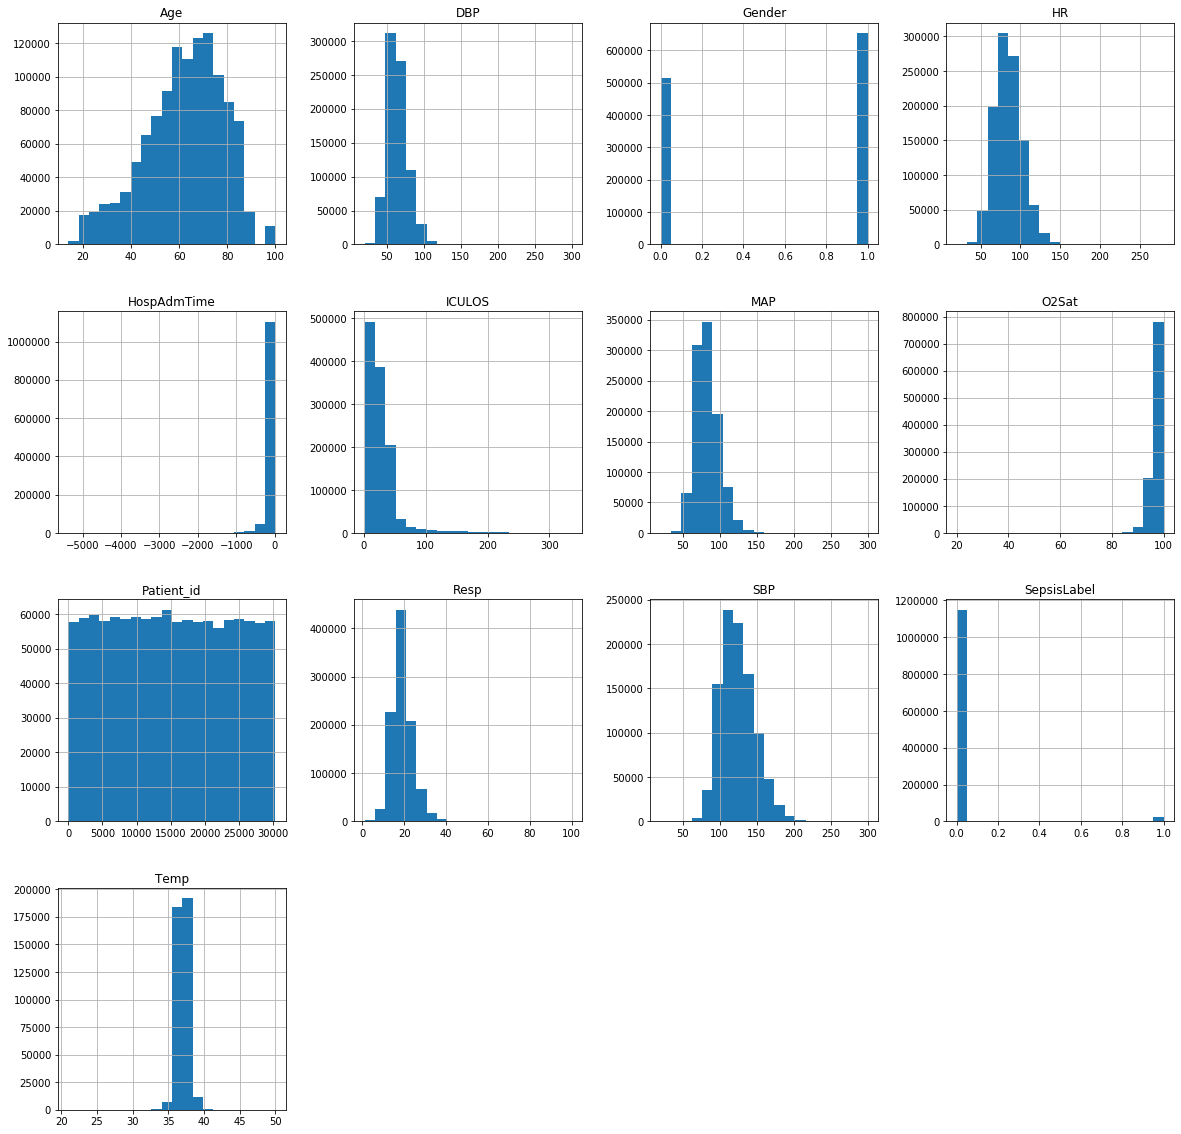

In [89]:
df_train_ad.hist(bins=20, figsize=(20,20))

In [90]:
columns = df_train_ad.columns
_missing = df_train_ad.isnull().sum() 
missing_value_train_ad = pd.DataFrame({'column_name': columns,
                                 '_missing': _missing})

feature_missing = list(missing_value_train_ad[missing_value_train_ad._missing>0].column_name)

### median as data is skewed

In [92]:
for feature in feature_missing:
    df_train_ad[feature]=df_train_ad.groupby("Patient_id")[feature].transform(lambda x: x.fillna(x.median()))


In [93]:
(df_train_ad.isnull().sum() ).sort_values(ascending=False)

DBP            197065
SBP              8488
Temp             5794
MAP              1997
Resp             1249
O2Sat             137
HR                 83
HospAdmTime         8
Patient_id          0
SepsisLabel         0
ICULOS              0
Gender              0
Age                 0
dtype: int64

In [94]:
df_train_ad["DBP"]=df_train_ad["DBP"].fillna(df_train_ad["DBP"].median())

In [95]:
x=['DBP',
'SBP',
'Temp',
'MAP',
'Resp',
'O2Sat',
'HR','HospAdmTime']

for i in x:
    df_train_ad[i]=df_train_ad[i].fillna(df_train_ad[i].median())

In [96]:
(df_train_ad.isnull().sum() ).sort_values(ascending=False)

Patient_id     0
SepsisLabel    0
ICULOS         0
HospAdmTime    0
Gender         0
Age            0
Resp           0
DBP            0
MAP            0
SBP            0
Temp           0
O2Sat          0
HR             0
dtype: int64

In [97]:
df_train_ad.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'Age', 'Gender',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_id'],
      dtype='object')

In [98]:
df_train_ad.drop('Patient_id', axis=1, inplace=True)

In [101]:
from sklearn.feature_selection import SelectKBest, chi2
### apply selectkBest
ordered_rank_features=SelectKBest(score_func=chi2, k='all')
ordered_feature=ordered_rank_features.fit(X,y)

dfscores=pd.DataFrame(ordered_feature.scores_,columns=['Score'])
dfcolumns=pd.DataFrame(df_train_ad.drop(['SepsisLabel'], axis=1).columns)
features_rank=pd.concat([dfcolumns,dfscores], axis=1)
features_rank.columns=['Features','Scores']


In [106]:
features_rank.nlargest(12, 'Scores')

,Features,Scores
10,ICULOS,2045.982119
8,Gender,54.508340
0,HR,53.849686
6,Resp,30.049202
4,MAP,6.162760
3,SBP,4.599830
5,DBP,3.058552
2,Temp,1.605874
9,HospAdmTime,0.331270
1,O2Sat,0.126737


In [107]:
df_train_ad.drop(['Age', 'O2Sat', 'HospAdmTime'], axis=1, inplace=True)

In [108]:
X=df_train_ad.drop(['SepsisLabel'], axis=1)
y=df_train_ad['SepsisLabel']

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7)

In [110]:
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[0.275     , 0.55551724, 0.38530466, ..., 0.15656566, 0.        ,
        0.00298507],
       [0.33269231, 0.52758621, 0.55197133, ..., 0.19191919, 1.        ,
        0.0238806 ],
       [0.2       , 0.5137931 , 0.53405018, ..., 0.17171717, 0.        ,
        0.09253731],
       ...,
       [0.29230769, 0.53655172, 0.36200717, ..., 0.25252525, 1.        ,
        0.05671642],
       [0.19230769, 0.54206897, 0.26523297, ..., 0.14141414, 0.        ,
        0.03283582],
       [0.29230769, 0.54793103, 0.45340502, ..., 0.23232323, 1.        ,
        0.05074627]])

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)


In [112]:
df_train_ad.head()

,HR,Temp,SBP,MAP,DBP,Resp,Gender,ICULOS,SepsisLabel
0,76.0,36.695,119.5,83.5,64.5,16.0,1,1,0
1,72.0,36.695,106.0,77.0,60.0,17.0,1,2,0
2,73.0,36.695,109.0,79.0,62.0,16.0,1,3,0
3,75.0,36.390,112.0,84.0,65.0,17.0,1,4,0
4,81.0,36.695,117.0,85.0,68.0,16.0,1,5,0


In [124]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [114]:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

RandomForestClassifier()

In [115]:
y_pred=model1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[344413     39]
 [  5821    435]]
0.9832909428926628
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    344452
           1       0.92      0.07      0.13      6256

    accuracy                           0.98    350708
   macro avg       0.95      0.53      0.56    350708
weighted avg       0.98      0.98      0.98    350708



In [122]:
model1b = RandomForestClassifier(class_weight="balanced")
model1b.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [123]:
y_pred=model1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[344413     39]
 [  5821    435]]
0.9832909428926628
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    344452
           1       0.92      0.07      0.13      6256

    accuracy                           0.98    350708
   macro avg       0.95      0.53      0.56    350708
weighted avg       0.98      0.98      0.98    350708



In [116]:
model2 = AdaBoostClassifier()
model2.fit(X_train, y_train)

AdaBoostClassifier()

In [118]:
y_pred=model2.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[344372     80]
 [  6229     27]]
0.9820106755477491
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    344452
           1       0.25      0.00      0.01      6256

    accuracy                           0.98    350708
   macro avg       0.62      0.50      0.50    350708
weighted avg       0.97      0.98      0.97    350708



In [119]:
model3=GaussianNB()
model3.fit(X_train, y_train)

GaussianNB()

In [120]:
y_pred=model3.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[336361   8091]
 [  5186   1070]]
0.9621422950146561
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    344452
           1       0.12      0.17      0.14      6256

    accuracy                           0.96    350708
   macro avg       0.55      0.57      0.56    350708
weighted avg       0.97      0.96      0.97    350708



In [125]:
model=  RandomForestClassifier()

In [126]:
est=[int(x) for x in np.linspace(start = 60, stop = 120, num = 7)]

In [127]:
grid={'n_estimators':est}
cv=StratifiedKFold(n_splits=5,random_state=None, shuffle=False)


In [128]:
model4=GridSearchCV(model, grid, cv=cv, n_jobs=-1, scoring=None)
model4.fit(X_train,y_train)

/home/stenzr/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [60, 70, 80, 90, 100, 110, 120]})

In [129]:
y_pred=model4.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[344415     37]
 [  5809    447]]
0.9833308621417247
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    344452
           1       0.92      0.07      0.13      6256

    accuracy                           0.98    350708
   macro avg       0.95      0.54      0.56    350708
weighted avg       0.98      0.98      0.98    350708



In [131]:
model5=GridSearchCV(model, grid, cv=cv, n_jobs=-1, scoring='recall')
model5.fit(X_train,y_train)

/home/stenzr/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [60, 70, 80, 90, 100, 110, 120]},
             scoring='recall')

In [132]:
y_pred=model4.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[344415     37]
 [  5809    447]]
0.9833308621417247
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    344452
           1       0.92      0.07      0.13      6256

    accuracy                           0.98    350708
   macro avg       0.95      0.54      0.56    350708
weighted avg       0.98      0.98      0.98    350708



In [135]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [136]:
sampler = RandomOverSampler(random_state=0)

In [137]:
X_train_s, y_train_s = sampler.fit_resample(X_train, y_train)

In [139]:
Counter(y_train)

Counter({0: 803499, 1: 14819})

In [140]:
Counter(y_train_s)

Counter({0: 803499, 1: 803499})

In [141]:
model_1_os = RandomForestClassifier()
model_1_os.fit(X_train_s, y_train_s)

RandomForestClassifier()

In [142]:
y_pred=model_1_os.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[344357     95]
 [  5594    662]]
0.9837785280062046
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    344452
           1       0.87      0.11      0.19      6256

    accuracy                           0.98    350708
   macro avg       0.93      0.55      0.59    350708
weighted avg       0.98      0.98      0.98    350708



In [143]:
class_weight = dict({0:1, 1:54})

In [144]:
model_1_cw = RandomForestClassifier(class_weight=class_weight)
model_1_cw.fit(X_train_s, y_train_s)

RandomForestClassifier(class_weight={0: 1, 1: 54})

In [145]:
y_pred=model_1_cw.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[344378     74]
 [  5655    601]]
0.9836644730088849
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    344452
           1       0.89      0.10      0.17      6256

    accuracy                           0.98    350708
   macro avg       0.94      0.55      0.58    350708
weighted avg       0.98      0.98      0.98    350708



In [147]:
import pickle

In [149]:
with open('model.pickle','wb') as f:
    pickle.dump(model_1_os,f)